Actividad Fundamental 3: Entrenamiento de Red Neuronal Artificial simple.


Nombre: Victor Imanol Villegas Torres


Matricula: 1958615


Hora clase: N1

I. Entrenar una red neuronal artificial en el conjunto de datos MNIST basándose en el ejemplo que se discutió en clase

In [1]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [2]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

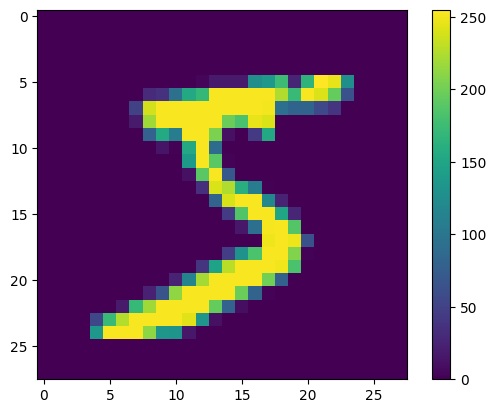

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

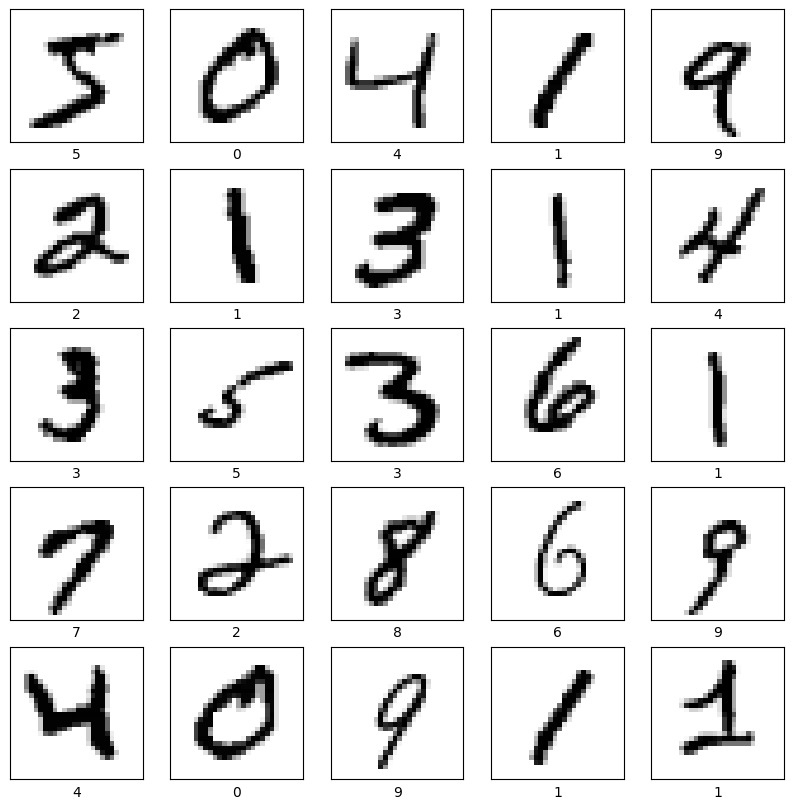

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2612 - accuracy: 0.9256
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1136 - accuracy: 0.9667
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0786 - accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0593 - accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0456 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0357 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0292 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0233 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0190 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.016

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0761 - accuracy: 0.9808 - 615ms/epoch - 2ms/step

Test accuracy: 0.9807999730110168


In [16]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [17]:
predictions[0]

array([2.2722421e-10, 1.5739922e-11, 2.9527884e-08, 4.6339642e-06,
       6.8528395e-12, 1.5636542e-07, 3.6378980e-16, 9.9999040e-01,
       2.0951910e-08, 4.6963478e-06], dtype=float32)

In [18]:
np.argmax(predictions[0])

7

In [19]:
test_labels[0]

7

In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

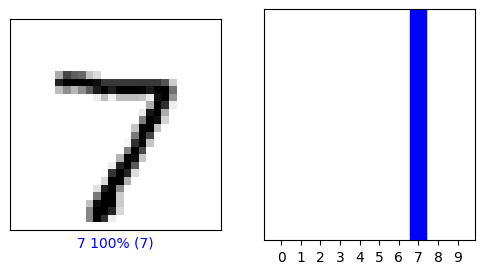

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

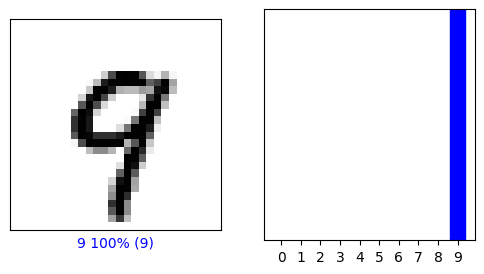

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

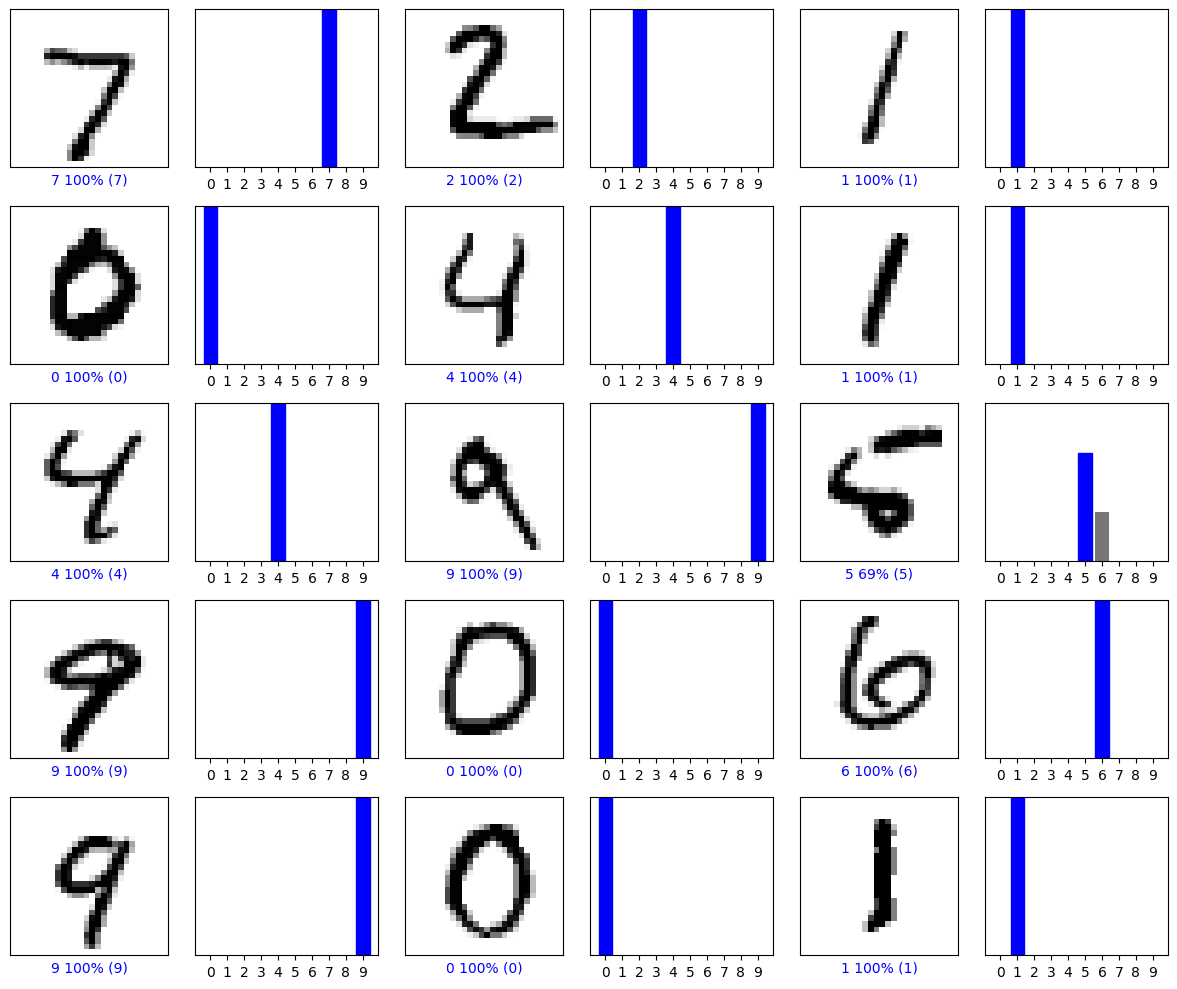

In [23]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [24]:
# usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.
img = test_images[1]

print(img.shape)

(28, 28)


In [25]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 21ms/step
[[1.3735183e-13 5.4477960e-07 9.9999940e-01 2.5868032e-09 2.6739554e-21
  2.6454112e-09 3.2638768e-12 1.3340217e-18 1.9274486e-09 6.3749532e-18]]


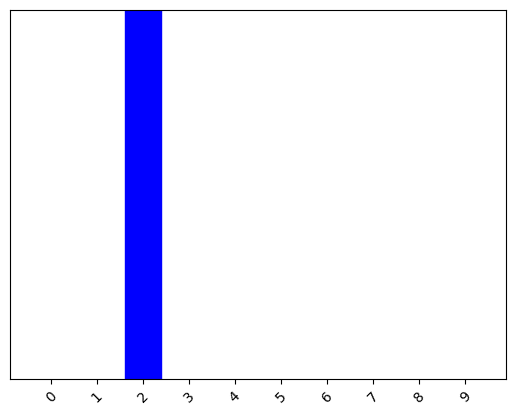

In [27]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [28]:
np.argmax(predictions_single[0])

2